In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('bike_sharing.csv')
df.drop(df.columns[24:29], axis=1, inplace=True)

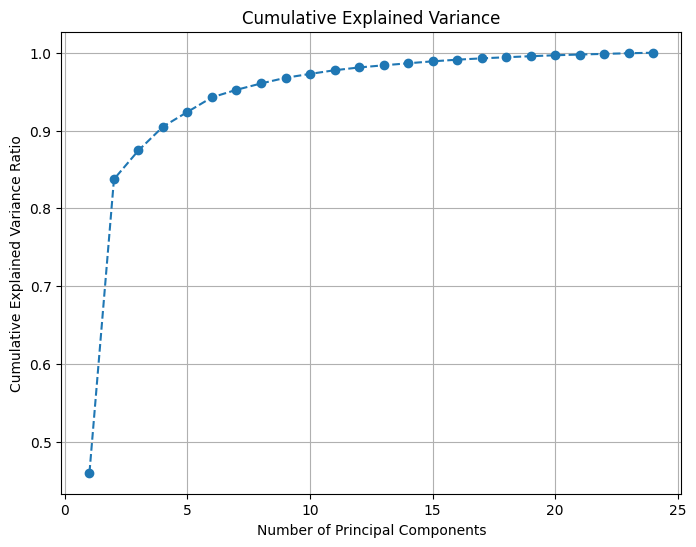

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=24)
X_pca = pca.fit_transform(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

90%: 4 Principle Components
98%: 11 Principle Components

There is a swift drop off in the contribution of each principal component that is added.  Just having 2 principle components serves to capture a significant portion of the variance (84%), while only a single component would cover only 46%.  each additional compnent after 2 adds less than 4% and decreasing with each added component.

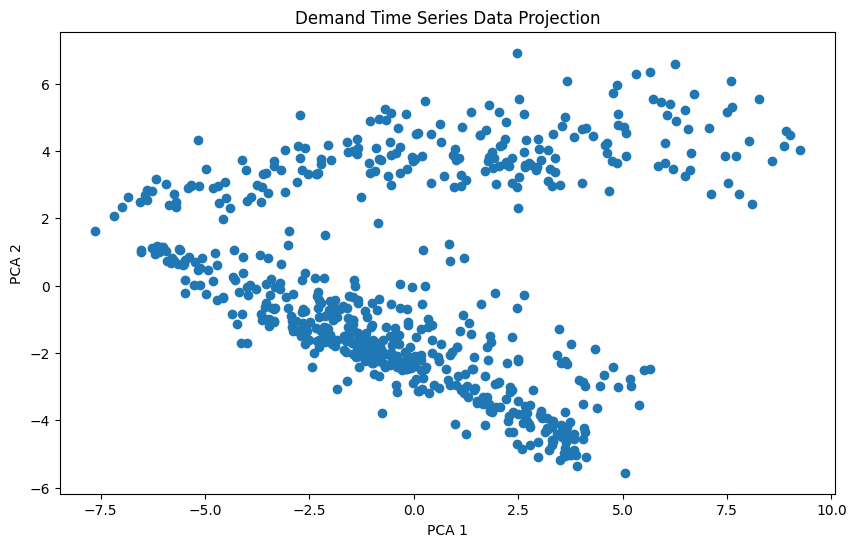

In [18]:
#scatter plot of PCA 1 and PCA 2 projection of time series data
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Demand Time Series Data Projection')
plt.show()


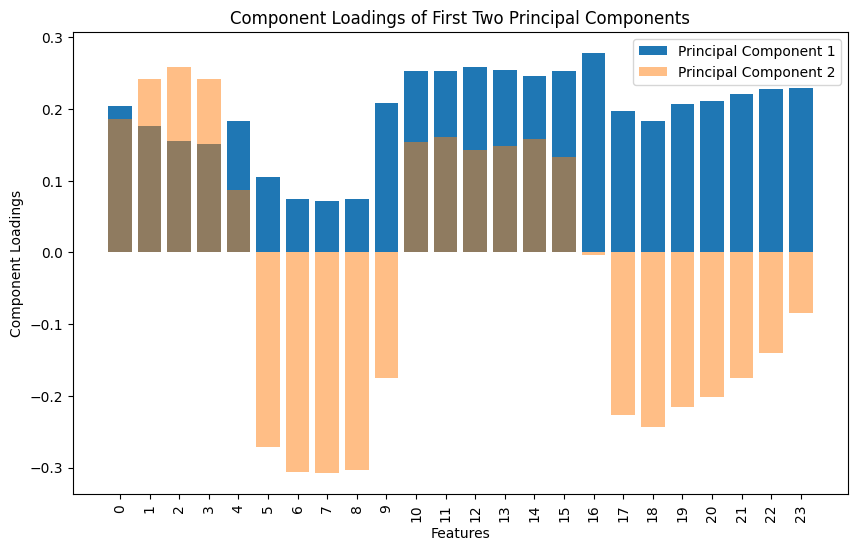

In [6]:

components_df = pd.DataFrame(data=pca.components_[:2], columns=df.columns)

# bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(components_df.columns)), components_df.iloc[0], label='Principal Component 1')
plt.bar(range(len(components_df.columns)), components_df.iloc[1], label='Principal Component 2', alpha=0.5)
plt.xticks(range(len(components_df.columns)), components_df.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Component Loadings')
plt.title('Component Loadings of First Two Principal Components')
plt.legend()
plt.show()

The second component captures the variance associated with off peak bicycle usage.  PCA 2 is negatively coorelated with PCA 1 during the periods of peak usage of 5-10 and 16-23.  Additionally PCA 2 is positvely correlated during off peak hours.  PCA 1 is postive for all of its periods.  Thus PCA 2 exists to capture the variance associated with the peak and off peak nature of the bicycle rental data.

c:\Users\fenst\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


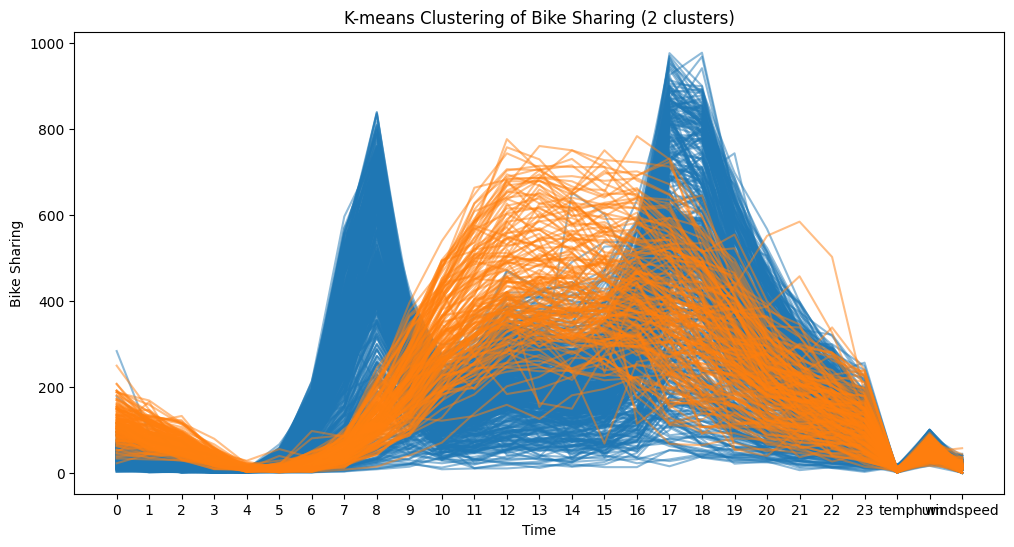

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=8)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_


plt.figure(figsize=(12, 6))

# Plot data points
for cluster in range(2):
    cluster_data = df[cluster_labels == cluster]
    plt.plot(cluster_data.T, color='C{}'.format(cluster), alpha=0.5, label='Cluster {}'.format(cluster + 1))

plt.xlabel('Time')
plt.ylabel('Bike Sharing')
plt.title('K-means Clustering of Bike Sharing (2 clusters)')
#plt.legend()
plt.show()

The data above split into 2 clusters appears to show 2 distinct groups of riders.  The first in blue are riders who look to ride bikes frequently in the morning and in the evening, but not during the day.  This group can be interpreted to be the weekday commuters.  The second group of riders in orange rent bikes later in the morning, and do so consistently throughout the day and evening.  This group can be seen as pleasure riders, likely weekend riders and tourists.

c:\Users\fenst\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


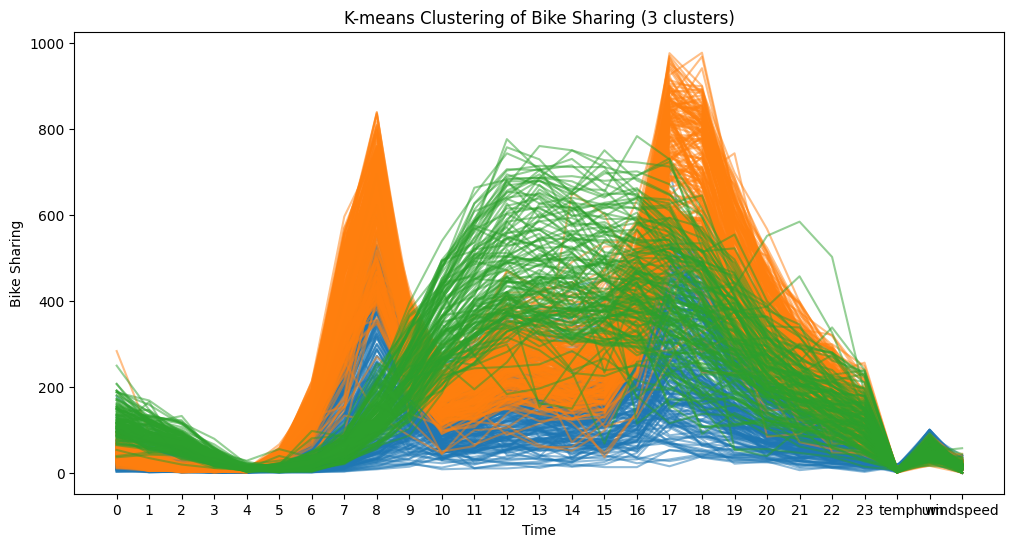

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=8)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

#selected_features = df.iloc[:, :24]

plt.figure(figsize=(12, 6))

# Plot data points color-coded by cluster
for cluster in range(3):
    cluster_data = df[cluster_labels == cluster]
    plt.plot(cluster_data.T, color='C{}'.format(cluster), alpha=0.5, label='Cluster {}'.format(cluster + 1))

plt.xlabel('Time')
plt.ylabel('Bike Sharing')
plt.title('K-means Clustering of Bike Sharing (3 clusters)')
#plt.legend()
plt.show()

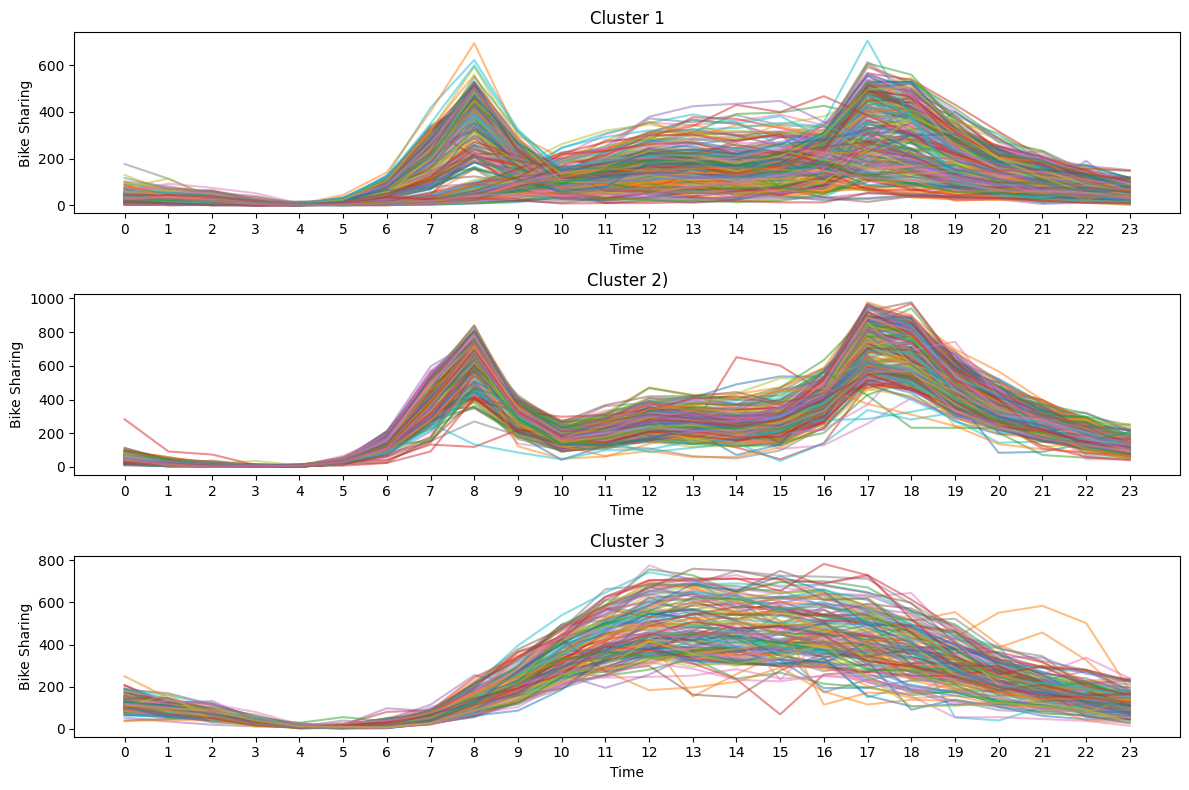

In [24]:
df = pd.read_csv('bike_sharing.csv')
df.drop(df.columns[-1], axis=1, inplace=True)

# Split the data based on cluster assignments
cluster_1_data = df[cluster_labels == 0]
cluster_2_data = df[cluster_labels == 1]
cluster_3_data = df[cluster_labels == 2]

# Plot each cluster's time series in separate plots
plt.figure(figsize=(12, 8))

# Plot cluster 1 data
plt.subplot(3, 1, 1)
plt.plot(cluster_1_data.iloc[:, :24].T, alpha=0.5)
plt.title('Cluster 1')
plt.xlabel('Time')
plt.ylabel('Bike Sharing')
data1=cluster_1_data.iloc[:, 24:]

# Plot cluster 2 data
plt.subplot(3, 1, 2)
plt.plot(cluster_2_data.iloc[:, :24].T, alpha=0.5)
plt.title('Cluster 2)')
plt.xlabel('Time')
plt.ylabel('Bike Sharing')
data2=cluster_2_data.iloc[:, 24:]
# Plot cluster 3 data
plt.subplot(3, 1, 3)
plt.plot(cluster_3_data.iloc[:, :24].T, alpha=0.5)
plt.title('Cluster 3')
plt.xlabel('Time')
plt.ylabel('Bike Sharing')
data3 = cluster_3_data.iloc[:, 24:]
plt.tight_layout()
plt.show()

In [25]:
# find average temp, wind speed, humidity for each cluster

print("Cluster 1 Data-other features):")
print(data1.mean())
print("\nCluster 2 Data-other features):")
print(data2.mean())
print("\nCluster 3 Data-other features):")
print(data3.mean())




Cluster 1 Data-other features):
temp          8.606774
hum          55.701613
windspeed    16.113257
dtype: float64

Cluster 2 Data-other features):
temp          5.456330
hum          47.453184
windspeed    15.359863
dtype: float64

Cluster 3 Data-other features):
temp          5.474245
hum          51.402878
windspeed    14.820159
dtype: float64


Based on the combined results of the 3 clusters 3 new rider groups have appeared.  Starting with the second cluster, this group remains the commuters, but now is exclusive to those who will commute even in worse conditions.  the average temperature for this cluster are 5.5.  Cluster 1 captures the commuters who are willing to take the bike, but only when conditions are more favorable.  Group 3 remains the individuals who would use the bike during the day for non-commuter purposes, likely during the weekend.